In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from flask import Flask, request, jsonify
import pickle

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
data = pd.read_csv(url)

# Display first few rows of the dataset
print(data.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [3]:
# Drop unnecessary columns
data.drop(columns=['UDI', 'Product ID'], inplace=True)

# Features and target
X = data.drop(columns=['Machine failure'])
y = data['Machine failure']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['Type'])

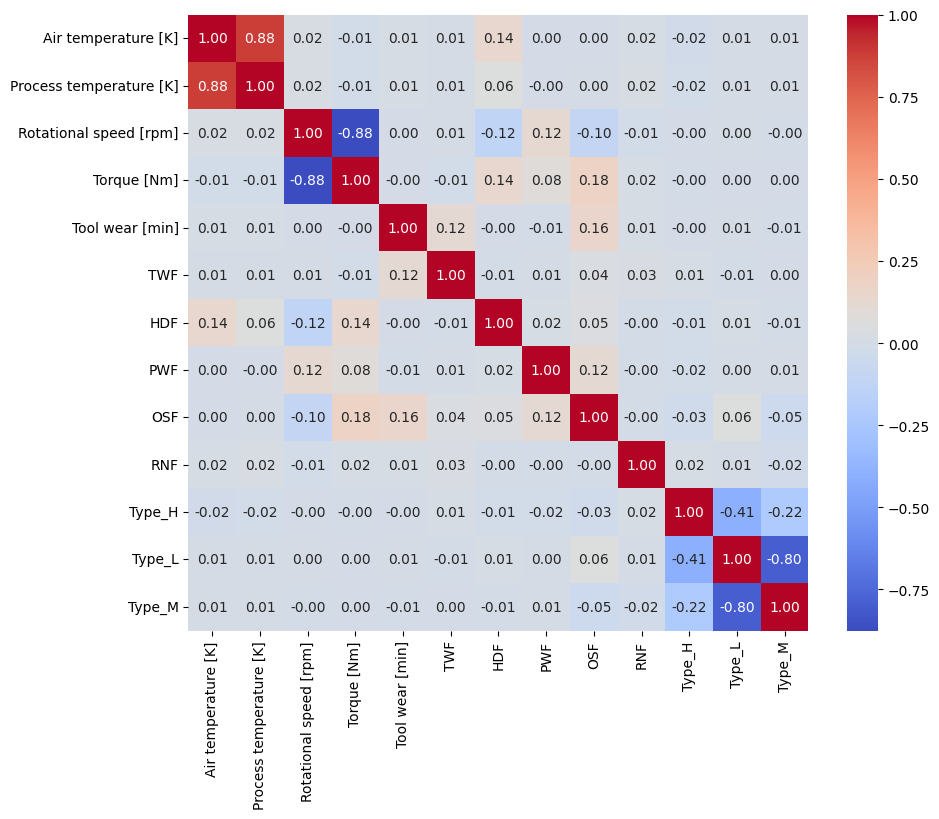

In [5]:
# Correlation matrix
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [10]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
model = pickle.load(open(filename, 'rb'))

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    # Preprocess the data as required
    df = pd.DataFrame(data, index=[0])
    df = pd.get_dummies(df, columns=['Type'])
    # Ensure all columns are present
    for col in X.columns:
        if col not in df.columns:
            df[col] = 0
    prediction = model.predict(df)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
